In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('process_heart.csv')


Bad key text.latex.preview in file C:\Users\阿超\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\阿超\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\阿超\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is save

In [2]:
#查看预处理后的数据集
df.shape
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,chest_pain_type_asymptomatic,...,rest_ecg_normal,exercise_induced_angina_1,exercise_induced_angina_no,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknow
0,63,145,233,150,2.3,0,1,0,1,1,...,1,0,1,0,0,1,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0
2,41,130,204,172,1.4,0,1,1,0,0,...,1,0,1,1,0,0,1,0,0,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,0,1,1,0,0,1,0,0,0
4,57,120,354,163,0.6,0,1,1,0,0,...,0,1,0,1,0,0,1,0,0,0


In [3]:
#划分特征列和标签列
X = df.drop('target',axis=1)

In [4]:
y=df['target']

In [5]:
y.shape

(303,)

# 划分训练集和测试集

In [6]:
from sklearn.model_selection import  train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [7]:
X_train.shape

(242, 26)

In [8]:
X_test.shape

(61, 26)

In [9]:
y_train.shape

(242,)

In [10]:
y_test.shape

(61,)

In [11]:
X_test.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,rest_ecg_normal,exercise_induced_angina_1,exercise_induced_angina_no,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknow
246,56,134,409,150,1.9,2,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
183,58,112,230,165,2.5,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
229,64,125,309,131,1.8,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
126,47,112,204,143,0.1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
184,50,150,243,128,2.6,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0


# 构建随机森林分类模型，在训练集上训练模型

In [12]:
from sklearn.ensemble import RandomForestClassifier


In [13]:
model=RandomForestClassifier(max_depth=5,n_estimators=100,random_state=5)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=5)

 # 可视化随机森林中一颗决策树

In [14]:
len(model.estimators_)

100

In [15]:
#指定索引为7的决策树
estimator=model.estimators_[7]

In [16]:
estimator

DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=2059200585)

In [17]:
#将特征值转化为字符串
feature_names=X_train.columns
y_train_str=y_train.astype('str')
y_train_str[y_train_str == '0']='no disease'
y_train_str[y_train_str == '1']='disease'
y_train_str=y_train_str.values

In [20]:
import os
os.environ["PATH"] += os.pathsep + "D:\tools\graphviz\bin"

from sklearn.tree import export_graphviz
export_graphviz(estimator,out_file='tree.dot',
                feature_names=feature_names,
                class_names=y_train_str,
                rounded=True,proportion=True,
                label='root',
                precision=2,filled=True)
from subprocess import call
call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=600'])
from IPython.display import Image
Image(filename='tree.png')

FileNotFoundError: [WinError 2] 系统找不到指定的文件。

In [21]:
import eli5
eli5.show_weights(estimator,feature_names=feature_names.to_list())

Weight,Feature
0.3552,exercise_induced_angina_no
0.1244,thalassemia_reversable defect
0.1120,age
0.0900,chest_pain_type_typical angina
0.0856,st_slope_flat
0.0619,sex_female
0.0530,cholesterol
0.0318,fasting_blood_sugar_lower than 120mg/ml
0.0279,thalassemia_normal
0.0167,rest_ecg_normal


# 特征重要性分析

In [14]:
model.feature_importances_

array([0.05333968, 0.04486284, 0.04585827, 0.08832805, 0.08059508,
       0.14386802, 0.02343513, 0.02153512, 0.00973076, 0.00613212,
       0.02517908, 0.14831294, 0.00652264, 0.00611153, 0.00828946,
       0.00081268, 0.01226936, 0.03826383, 0.03888825, 0.03514877,
       0.02624365, 0.00457446, 0.07295943, 0.00296379, 0.05520515,
       0.00056991])

In [15]:
print('特征排序:')
feature_names=X_test.columns
feature_importances=model.feature_importances_
indices=np.argsort(feature_importances)[::-1]
for index in indices:
    print("featyre %s (%f) "% (feature_names[index],feature_importances[index]))

特征排序:
featyre chest_pain_type_typical angina (0.148313) 
featyre num_major_vessels (0.143868) 
featyre max_heart_rate_achieved (0.088328) 
featyre st_depression (0.080595) 
featyre thalassemia_fixed defect (0.072959) 
featyre thalassemia_reversable defect (0.055205) 
featyre age (0.053340) 
featyre cholesterol (0.045858) 
featyre resting_blood_pressure (0.044863) 
featyre exercise_induced_angina_no (0.038888) 
featyre exercise_induced_angina_1 (0.038264) 
featyre st_slope_downsloping (0.035149) 
featyre st_slope_flat (0.026244) 
featyre chest_pain_type_non-anginal pain  (0.025179) 
featyre sex_female (0.023435) 
featyre sex_male (0.021535) 
featyre rest_ecg_normal (0.012269) 
featyre chest_pain_type_asymptomatic (0.009731) 
featyre rest_ecg_ST-T wave abnormality (0.008289) 
featyre fasting_blood_sugar_greater than 120mg/ml (0.006523) 
featyre chest_pain_type_atypical angina (0.006132) 
featyre fasting_blood_sugar_lower than 120mg/ml (0.006112) 
featyre st_slope_upsloping (0.004574) 
fe

In [16]:
import eli5
eli5.show_weights(model,feature_names=feature_names.to_list())

Weight,Feature
0.1483 ± 0.3160,chest_pain_type_typical angina
0.1439 ± 0.2390,num_major_vessels
0.0883 ± 0.1970,max_heart_rate_achieved
0.0806 ± 0.1642,st_depression
0.0730 ± 0.2304,thalassemia_fixed defect
0.0552 ± 0.1816,thalassemia_reversable defect
0.0533 ± 0.0970,age
0.0459 ± 0.0773,cholesterol
0.0449 ± 0.0736,resting_blood_pressure
0.0389 ± 0.1464,exercise_induced_angina_no


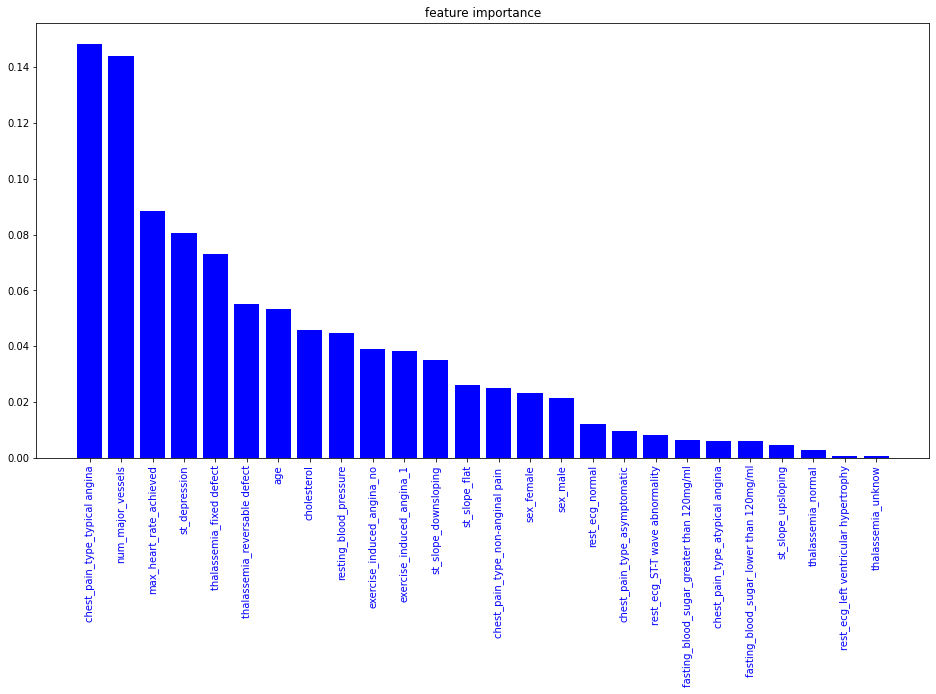

In [24]:
#画特征图
plt.figure(figsize=(16,8))
plt.title('feature importance')
plt.bar(range(len(feature_importances)),feature_importances[indices],color='b')
plt.xticks(range(len(feature_importances)),np.array(feature_names)[indices],color='b',rotation=90)
plt.show()
#典型心绞痛特征 心脏周围大血管个数 最大心率 心电图st-depression